Проект анализа оттока клиентов телекомуникационнной компании, таргетный столбец"Churm"

In [84]:
from pandas import *
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [85]:
url="https://drive.google.com/file/d/1EW4wfJM0dGzE7_yMEWQxTouSAtXCHrUP/view?usp=drive_link"
df = read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2]))

In [86]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.keys()


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

CТОЛБЕЦ "customerID" ИМЕЕТ НЕ ЧИСЛОВОЙ УНИКАЛЬНЫЙ КОД, КАЖДЫЙ КОД ПОВНОРЯЕТСЯ 1 РАЗ, ПОЭТОМУ ДЛЯ АНАЛИЗА БЕСПОЛЕЗЕН.


In [ ]:
df["customerID"].value_counts()

,count
customerID,
7590-VHVEG,1
3791-LGQCY,1
6008-NAIXK,1
5956-YHHRX,1
5365-LLFYV,1
...,...
9796-MVYXX,1
2637-FKFSY,1
1552-AAGRX,1


In [43]:
df = df.drop('customerID', axis= 1 )


In [44]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


КЛИЕНТЫ ПО ПОЛУ РАСПРЕДЕЛЕНЫ ПРИБЛИЗИТЕЛЬНО ОДИНАКОВО

In [9]:
df["gender"].value_counts(normalize=True)


,proportion
gender,
Male,0.504756
Female,0.495244


In [48]:
df.loc[df['gender'] == 'Male','gender'] = 1
df.loc[df["gender"] == "Female",'gender'] = 0
df['gender'] = df['gender'].astype('int8')
df['gender'].dtype

dtype('int8')

СТОЛБЕЦ SeniorCitizen ПОКАЗЫВАЕТ КОЛЛИЧЕСТВО ПОЖИЛЫХ КЛИЕНТОВ, ОДНАКО НЕИЗВЕСТНО В КАКОМ ВОЗРАСТЕ.

In [10]:
df["SeniorCitizen"].value_counts()


,count
SeniorCitizen,
0,5901
1,1142


СТОЛБЕЦ Partner ПОКАЗЫВАЕТ ОДИН ЛИ ПОЛЬЗОВАТЕЛЬ У КОМАПАНИИ ИЛИ ЕСТЬ РОДСТВЕННИКИ, ПОСКОЛЬКУ ОН ЧИСЛОВОЙ, ЗАМЕНЮ YES\NO НА 1\0


In [8]:
df["Partner"].value_counts()


,count
Partner,
No,3641
Yes,3402


In [9]:
df.loc[df["Partner"] == 'Yes' ,'Partner'] = 1
df.loc[df["Partner"] == "No",'Partner'] = 0
df['Partner'] = df['Partner'].astype("int8")
df['Partner'].dtype

dtype('int8')

СТОЛБЕЦ Dependents ОТРАЖАЕТ НАЛИЧИЕ ИЗДИВЕНЦЕВ, ТАКЖЕ МЕНЯЮ НА ЧИСЛОВОЙ

In [54]:
df["Dependents"].value_counts()
df.loc[df['Dependents'] == 'Yes','Dependents'] = 1
df.loc[df["Dependents"] == "No",'Dependents'] = 0
df['Dependents'] = df['Dependents'].astype('int8')
df['Dependents'].dtype


dtype('int8')

СТОЛБЕЦ tenure СОДЕОЖИТ СРОК ПОЛЬЗОВАНИЯ УСЛУГАМИ, МЕС

In [11]:
df["tenure"] .value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


<Axes: ylabel='Density'>

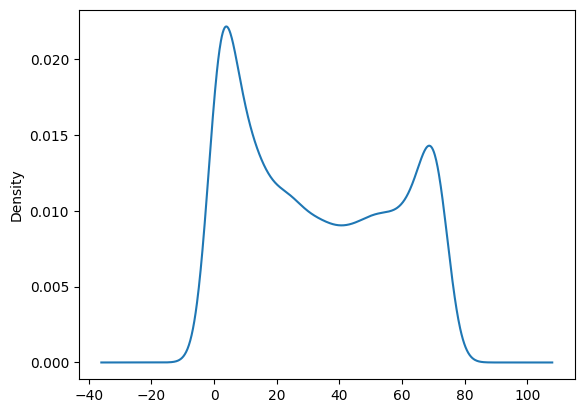

In [ ]:
#Имеются 2 наиболее распространеных значения это 1 и 72 мес
df["tenure"] .plot.density()


<Axes: ylabel='Frequency'>

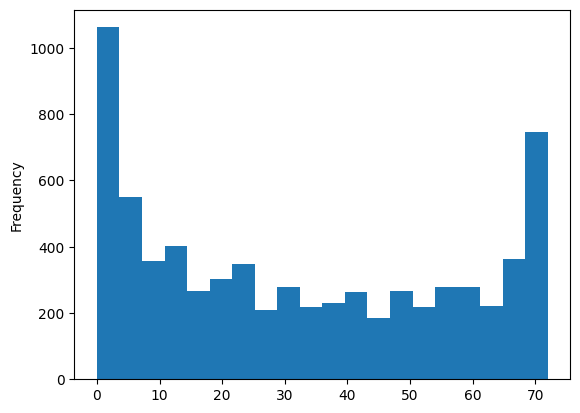

In [ ]:
df["tenure"].plot.hist(bins=20)
#ВЕРОЯНТНО ПИК В 1 МЕСЯЦ СВЯЗЩАН С ТЕМ ЧТО КОМПАНИЯ ПРЕДОСТАВЛЯЕТ УСЛУГИ ПЕРВЫЙ МЕСЯЦ БЕСПЛАТНО, ВТОРОЙ ПИК 72 МЕСЯЦА, ЭТО ПОСТОЯННЫЕ КЛИЕНТЫ

СТОЛБЕЦ PhoneService СОДЕРЖИТ ИНФОРМАЦИЮ, КТО ИЗ КЛИЕНТОВ ПОЛЬЗУЕТСЯ УСЛУГАМИ СВЯЗИ

In [13]:
df["PhoneService"].value_counts(normalize=True)
#90 проц имеют\имели телефонные услуги

,proportion
PhoneService,
Yes,0.903166
No,0.096834


In [53]:

df.loc[df['PhoneService'] == 'Yes','PhoneService'] = 1
df.loc[df["PhoneService"] == "No",'PhoneService'] = 0
df['PhoneService'] = df['PhoneService'].astype('int8')
df['PhoneService'].dtype


dtype('int8')

СТОЛБЕЦ MultipleLines ОТРАЖАЕТ КОЛИЧЕСТВО КЛИЕНТОВ ИМЕЮЩИХ НЕСКОЛЬКО ЛИНИЙ СВЯЗИ

In [14]:
df["MultipleLines"].value_counts(normalize=True)

#10% не имеет связи вообще, 42% пользуются услугой, 48% не пользуются

,proportion
MultipleLines,
No,0.481329
Yes,0.421837
No phone service,0.096834


СТОЛБЕЦ InternetService ОТОБРАЖАЕТ КЛИЧЕНТОВ КОТОРЫЕ ПОЛЬЗУЮТСЯ ИНТЕРНЕТОМ

In [15]:
df["InternetService"].value_counts(normalize=True)
#44% используют оптоволокно, 34% DSL, 21% не используют интернет

,proportion
InternetService,
Fiber optic,0.439585
DSL,0.343746
No,0.216669


СТОБЦЕЦ OnlineSecurity, КЛИЕНТЫ ИСПОЛЬЗУЮЩИЕ ЗАЩИТУ СОЕДИНЕНИЯ


In [16]:
df["OnlineSecurity"].value_counts(normalize=True)
#50% не пользкются защитой, 28% пользуются, 22% не пользуются интернетом вообще

,proportion
OnlineSecurity,
No,0.496663
Yes,0.286668
No internet service,0.216669


СТОЛБЕЦ OnlineBackup, КЛИЕНТЫ ПОЛЬЗУЮЩИЕСЯ УСЛУГОЙ ВОССТАНОВЛЕНИЯ ДАННЫХ

In [17]:
df["OnlineBackup"].value_counts(normalize=True)
# 44 не польз услугой, 34 пользуются, 22 нет интернета

,proportion
OnlineBackup,
No,0.438450
Yes,0.344881
No internet service,0.216669


СТОЛБЕЦ DeviceProtection, КЛИЕНТЫ ИСПЛЬЗУЮЩИЕ УСЛУГУ ЗАЩИТА УСТРОЙСТВА

In [ ]:
df["DeviceProtection"].value_counts(normalize=True)
# 44 не польз услугой, 34 пользуются, 22 нет интернета

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

СТОЛБЕЦ TechSupport, КЛИЕНТЫ ИСПОЛЬЗУЮЩИЕ ТЕХ ПОДДЕРЖКУ КАК УСЛУГУ

In [ ]:
df["TechSupport"].value_counts(normalize=True)
# 49% не польз услугой, 29% пользуются, 22% нет интернета.

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

СТОЛБЕЦ StreamingTV, КЛИЕНТЫ КОТОРЫЕ ИСПОЛЬЗУЮТ СТРИМИНГОВОЕ ТВ

In [ ]:
df["StreamingTV"].value_counts(normalize=True)
# 39 не польз услугой, 38 пользуются, 22 нет интернета.Тех поддержка. Телевидение


No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

СТОЛБЕЦ StreamingMovies, КЛИЕНТЫ ИСПОЛЬЗУЮЩИЕ ДОМ КИНОТЕАТРЫ КАК УСЛУГУ

In [ ]:
df["StreamingMovies"].value_counts(normalize=True)
# 39 не польз услугой, 38 пользуются, 22 нет интернета. Фильмы


No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

СТОБЕЦ Contract ОТОБРАЖАЕТ СРОКИ ЗАКЛЮЧЕНИЯ КОНТРАКТА НА УСЛУГИ

In [19]:
df["Contract"].value_counts(normalize=True)
#55% заключаютдоговор каждый месяц, 24% НА 2 года, 21 НА год

,proportion
Contract,
Month-to-month,0.550192
Two year,0.240664
One year,0.209144


СТОЛБЕЦ "PaperlessBilling", ОТОБРАЖАЕТ КЛИЕНТОВ ПОЛУЧАЮЩИХ БУМАЖНЫЙ ЧЕК ЗА ОПЛАТУ УСЛУГ


In [18]:
df["PaperlessBilling"].value_counts(normalize=True)
#59 проц без бумажного чека, 41 наоюорот

,proportion
PaperlessBilling,
Yes,0.592219
No,0.407781


СТОЛБЕЦ check, ОТРАЖАЕТ СПОСОБЫ

In [21]:
df["PaymentMethod"].value_counts(normalize=True)
#34% ИСПОЛЬЗУЮТ ЭЛКТРОННЫЙ ЧЕК, 23% используют почтовый чек, 22% банковский перевод, 21% кредитная карта

,proportion
PaymentMethod,
Electronic check,0.335794
Mailed check,0.228880
Bank transfer (automatic),0.219225
Credit card (automatic),0.216101


СТОЛБЕЦ MonthlyCharges, СУММА ЕЖЕМЕСЯЧНОЙ ОПЛАТЫ

<Axes: ylabel='Frequency'>

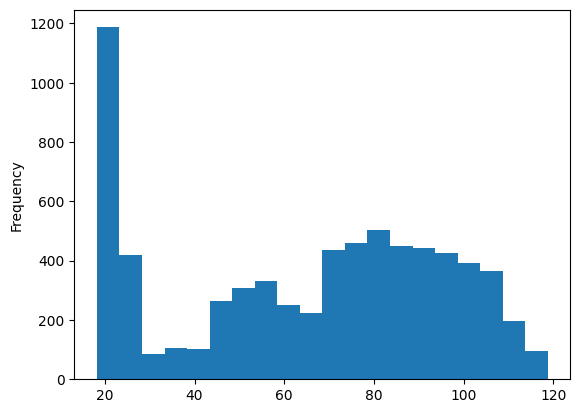

In [ ]:
df["MonthlyCharges"].plot.hist(bins=20)
#суммы ежемесечных ваплат разные но большинство в районе 20, ОДНАКО СИЛЬНО ВАРЬИРУЮТСЯ

СТОЛБЕЦ TotalCharges, ОБЩАЯ СУММА ОПЛАТ ЗА УСЛУГИ

In [22]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [23]:
df[df["TotalCharges"] == " "]
#11 СТРОК СОДЕРЖАТ ПРОБЕЛЫ, ТО И СТОЛБЕЦ TENURE СОДЕРЖАТ 0, ТО ЕСТЬ КЛИЕНТЫ ПОЛЬЗУЮТСЯ УСЛУГАМИ МЕНЬШЕ МЕСЯЦА, КОТОРЫЙ СКОРЕЕ ВСЕГО БЕСПЛАТНЫЙ

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,0,1,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,1,1,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,1,1,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,1,1,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,1,1,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,1,1,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,1,1,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,1,1,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,1,1,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<Axes: ylabel='Frequency'>

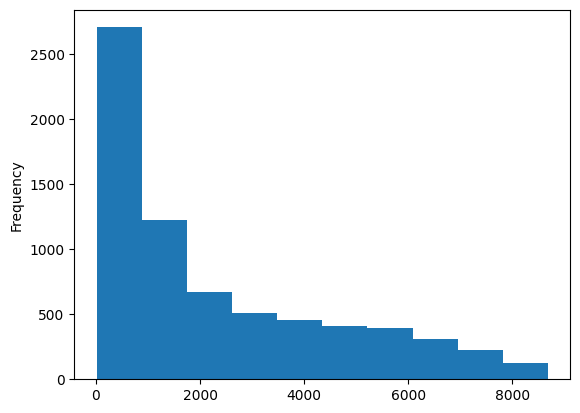

In [24]:

#переводим данные К ТИПУ FLOAT и заменяем ошибки нулем
df['TotalCharges'] = to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].plot.hist()

СТОЛБЕЦ "Churn" ОТОБРАЖАЕТ УДЕРЖАНИЕ КЛИЕНТОВ, ТАРГЕТНЫЙ

In [25]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [52]:
df.loc[df['Churn'] == 'Yes','Churn'] = 1
df.loc[df["Churn"] == "No",'Churn'] = 0
#проверить nan значения
df['Churn'] = df['Churn'].astype('int8')
df['Churn'].dtype

dtype('int8')

In [28]:
df["Churn"].value_counts(normalize=True)
#ТАКИМ ОБРАЗОМ, 73% ПОЛЬЗОВАТЕЛЕЙ ОТКАЗАЛИСЬ ОТ УСЛУГ, СООТВЕТСТВЕННО ГЛОБАЛЬНОЙ ЗАДАЧЕЙ СТАВИТЬСЯ ВЫЯСНИТЬ КОРРЕЛЯЦИИ, ПО КАКОЙ ПРИЧИНЕ БЫЛ ОТКАЗ

,proportion
Churn,
0,0.73463
1,0.26537


ДАЛЕЕ ДВУХМЕРНЫЙ АНАЛИЗ

<Axes: xlabel='InternetService', ylabel='count'>

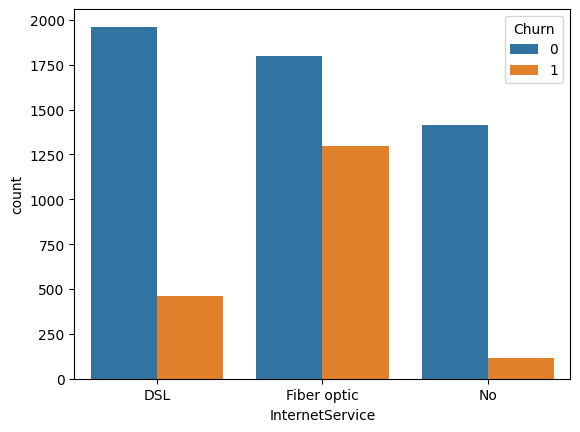

In [61]:
sb.countplot(df, x="InternetService", hue="Churn")

In [64]:
df[df["InternetService"]== 'No']['Churn'].value_counts(normalize=True)
#среди тех кто не пользовался интернетом отток клиентов всего 7,5%

,proportion
Churn,
0,0.92595
1,0.07405


In [66]:
df[df["InternetService"]== 'DSL']['Churn'].value_counts(normalize=True)
#однако их тех кто пользовался DSL подключением, отток составил уже 19%

,proportion
Churn,
0,0.810409
1,0.189591


In [67]:
df[df["InternetService"]== 'Fiber optic']['Churn'].value_counts(normalize=True)
# среди тех кто пользовался оптоволокном, отток клиентов 42%

,proportion
Churn,
0,0.581072
1,0.418928


<Axes: xlabel='InternetService', ylabel='count'>

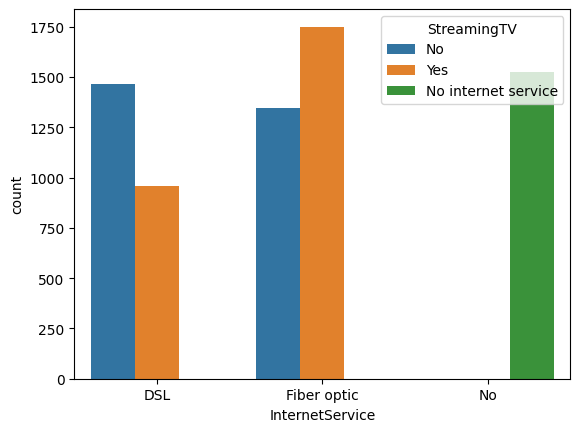

In [68]:
sb.countplot(df, x="InternetService", hue="StreamingTV")
#среди пользователей стриминг ТВ больше тех, кто подключал оптоволокно

In [70]:
df[df["InternetService"] == "Fiber optic"]["StreamingTV"].value_counts(normalize=True)
#обладатели оптоволокна используют Стриминг ТВ в 56% случаев

,proportion
StreamingTV,
Yes,0.565245
No,0.434755


In [71]:
df[df["InternetService"] == "DSL"]["StreamingTV"].value_counts(normalize=True)
#обладатели DSL используют Стриминг ТВ в 39% случаев

,proportion
StreamingTV,
No,0.604709
Yes,0.395291


<Axes: xlabel='StreamingTV', ylabel='count'>

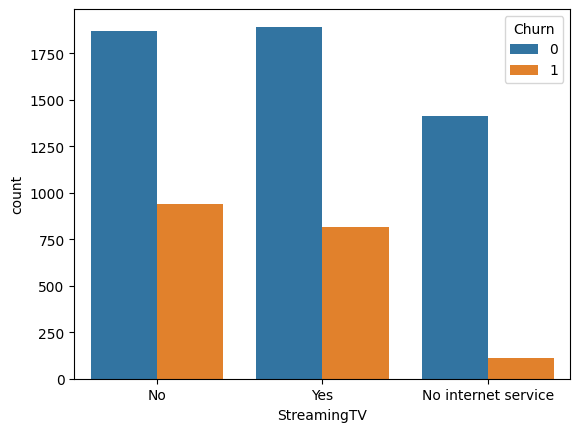

In [72]:
sb.countplot(df, x="StreamingTV", hue="Churn")
# телевидение это услуга удерживающая клиента немного чаще

<Axes: xlabel='StreamingTV', ylabel='count'>

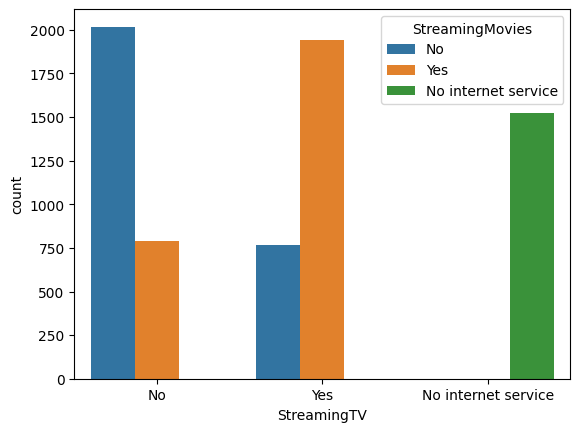

In [73]:
sb.countplot(df, x="StreamingTV", hue="StreamingMovies")
#чаще всего, владельцы стриминг ТВ также подключают пакет фильмов

<Axes: xlabel='MultipleLines', ylabel='count'>

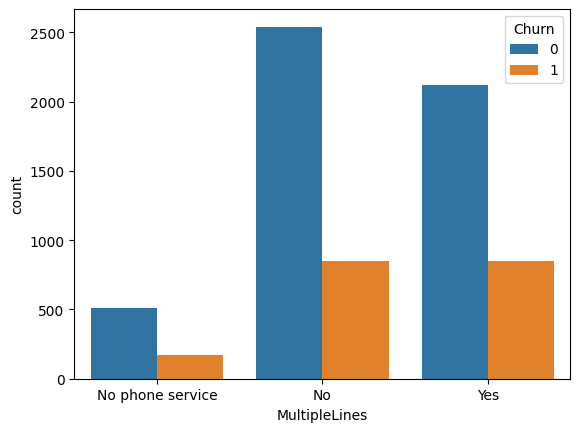

In [75]:
sb.countplot(df, x="MultipleLines", hue="Churn")
#владельцы услуги Multilines отказываются от услуги чуть чаще

<Axes: xlabel='Churn', ylabel='Count'>

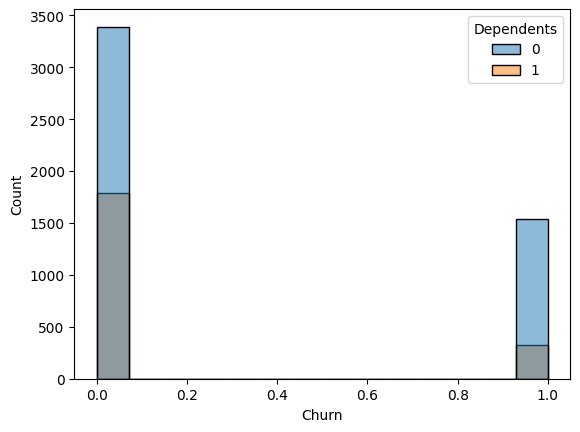

In [76]:
sb.histplot(df, x="Churn",hue='Dependents')
#как не страннно у тех кто отказывается от услуг гораздо меньше иждевенцев

<Axes: xlabel='InternetService', ylabel='count'>

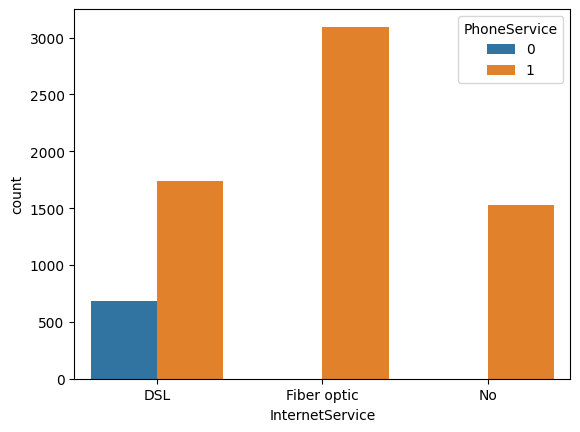

In [77]:
sb.countplot(df, x="InternetService", hue="PhoneService")
#все владельцы оптоволокна имеют телефонные услуги, а у тех кто не имееют интернета все имеют телефон.

<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

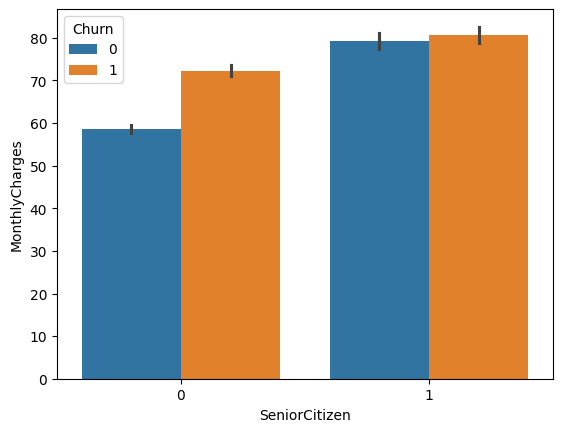

In [82]:
sb.barplot(df, x="SeniorCitizen", y= "MonthlyCharges", hue="Churn")


#ОПТОВОЛОКНО - КРАЙНЕ ПРОБЛЕМНАЯ УСЛУГА, МНОГО ОТКАЗОВ
#ТЕЛЕВИДЕНИЕ И ПАКЕТЫ ФИЛЬМОВ ЯВЛЯЮЬСЯ УДЕРЖИВАЮЩИМ ФАКТОРОМ
#СРЕДИ ПОЖИЛИЫХ КЛИЕНТОВ МНОГО ОТКАЗОВ ОТ УСЛУГ
#ЛЮДИ КОТОРЫЕ ИМЕЮТ ИЖДИВЕНЦЕВ ОТКАЗЫВАЮТСЯ ОТ УСЛУГ ЗНАЧИТЕЛЬНО РЕЖЕ
#ЛЮДИ НЕ ВЛАДЕЮЩИЕ ИНТЕРНЕТОМ ОКАЗЫВАЮТСЯ ОЧЕНЬ РЕДКО
#СРЕДИ ВЛАДЕЛЬЦЕВ ТЕЛЕФОНОВ, ВЛАДЕДЬЦЫ УСЛУГИ НЕСОЛЬКО ЛИНИЙ, ОТКАЗЫВАЮСЯ ОТ УСЛУГ ЧАЩЕ
ПОЖИЛЫЕ ЛЮДИ ОТКАЗАВШИЕСЯ И НЕ ОТКАЗАВШИЕСЯ ОТ УСЛУГ ПЛАТИЛИ ПОЧТИ ОДИНАКОГО, А НЕ ПОЖИЛЫЕ, ОТКАЗАВШИЕСЯ ОТ УСЛУГ ПЛАТИЛИ БОЛЬШЕ
